In [12]:
%matplotlib inline
import pandas as pd

In [2]:
file_mayra_index = 'mayra.plate.index.txt'
df_mayra_index   = pd.read_csv(file_mayra_index,sep='\t',index_col=['platename','Pos.Nr'])

df_mayra_index.loc['P1kCre1+2','1']

ChlreGene_ID55    Cre11.g468300
Name: (P1kCre1+2, 1), dtype: object

In [3]:
file_mayra_results = 'mayra.pcr.list.txt'
df_mayra_results = pd.read_csv(file_mayra_results,sep='\t')

In [4]:
df_mayra_results['genename'] = df_mayra_results[['platename','Pos.Nr']].apply(lambda x : df_mayra_index.loc[x['platename'],str(x['Pos.Nr'])],axis=1)

In [5]:
df_mayra_results = df_mayra_results.set_index('genename')

In [6]:
file_est_cov = 'est_cov.ver2.txt'
df_est_cov = pd.read_csv(file_est_cov,sep='\t',header=None)

In [7]:
def getit(x,col):
    try:
        return df_mayra_results.loc['.'.join(x.split('.')[0:2])][col]
    except KeyError:
        return 'No result yet'

In [8]:
col = 'right size'
df_est_cov[col] = df_est_cov[0].apply(lambda x :getit(x,col))
col = 'band - wrong size'
df_est_cov[col] = df_est_cov[0].apply(lambda x :getit(x,col))
col = 'no band'
df_est_cov[col] = df_est_cov[0].apply(lambda x :getit(x,col))


In [9]:
df_est_cov.to_csv(file_est_cov+'.addmayraresult.txt',sep='\t')

In [ ]:
df_mayra_results.loc['Cre09.g410650']

In [10]:
df_est_cov.head()

,0,1,2,3,4,5,6,7,8,right size,band - wrong size,no band
0,Cre15.g636750.t1.2.v5.5,1.000000,0.00949367088608,9.23714759536,0.00949367088608,Cre15.g636700,Cre15.g636800,0.0808429795852,0.546664804663,No result yet,No result yet,No result yet
1,Cre13.g575333.t1.1.v5.5,1.000000,0.554198473282,6.45261437908,0.673282442748,Cre13.g575300,Cre13.g575366,0.0674227226001,0.223591269701,No result yet,No result yet,No result yet
2,Cre16.g657800.t1.1.v5.5,0.982792,0.08,2.25493945188,0.08,Cre16.g657750,Cre16.g657850,0.694013609721,-0.491532697726,0,1,NaN
3,Cre02.g076250.t1.1.v5.5,1.000000,0.324687355257,47.9536679537,0.330708661417,Cre02.g076200,Cre02.g076300,-0.654345416953,0.526620719188,No result yet,No result yet,No result yet
4,Cre09.g390912.t1.1.v5.5,1.000000,0.201830663616,3.49635324266,0.203661327231,Cre09.g390875,Cre09.g390949,-0.263022403471,0.198574895738,No result yet,No result yet,No result yet


In [24]:
def get_dr(f):
    try:
        return float(f[3]) / (float(f[4])+0.0000000000001)
    except:
        return 'NA'
df_est_cov['depth ratio'] = df_est_cov[[3,4]].apply(get_dr,axis=1)

In [25]:
df_est_cov.head()

,0,1,2,3,4,5,6,7,8,right size,band - wrong size,no band,depth ratio
0,Cre15.g636750.t1.2.v5.5,1.000000,0.00949367088608,9.23714759536,0.00949367088608,Cre15.g636700,Cre15.g636800,0.0808429795852,0.546664804663,No result yet,No result yet,No result yet,972.98
1,Cre13.g575333.t1.1.v5.5,1.000000,0.554198473282,6.45261437908,0.673282442748,Cre13.g575300,Cre13.g575366,0.0674227226001,0.223591269701,No result yet,No result yet,No result yet,9.58382
2,Cre16.g657800.t1.1.v5.5,0.982792,0.08,2.25493945188,0.08,Cre16.g657750,Cre16.g657850,0.694013609721,-0.491532697726,0,1,NaN,28.1867
3,Cre02.g076250.t1.1.v5.5,1.000000,0.324687355257,47.9536679537,0.330708661417,Cre02.g076200,Cre02.g076300,-0.654345416953,0.526620719188,No result yet,No result yet,No result yet,145.003
4,Cre09.g390912.t1.1.v5.5,1.000000,0.201830663616,3.49635324266,0.203661327231,Cre09.g390875,Cre09.g390949,-0.263022403471,0.198574895738,No result yet,No result yet,No result yet,17.1675


In [38]:
dr = df_est_cov[(df_est_cov['depth ratio'] != 'NA')]['depth ratio']

(array([  7.35700000e+03,   4.12900000e+03,   2.06000000e+03,
          1.10300000e+03,   5.89000000e+02,   3.33000000e+02,
          2.72000000e+02,   1.83000000e+02,   1.41000000e+02,
          1.19000000e+02,   1.00000000e+02,   9.00000000e+01,
          7.60000000e+01,   5.50000000e+01,   4.50000000e+01,
          3.70000000e+01,   4.10000000e+01,   3.10000000e+01,
          2.50000000e+01,   1.80000000e+01,   1.90000000e+01,
          1.90000000e+01,   2.10000000e+01,   1.80000000e+01,
          1.40000000e+01,   1.50000000e+01,   1.40000000e+01,
          1.10000000e+01,   1.60000000e+01,   1.10000000e+01,
          5.00000000e+00,   1.20000000e+01,   3.00000000e+00,
          9.00000000e+00,   1.20000000e+01,   6.00000000e+00,
          6.00000000e+00,   1.20000000e+01,   7.00000000e+00,
          6.00000000e+00,   9.00000000e+00,   5.00000000e+00,
          5.00000000e+00,   5.00000000e+00,   1.00000000e+00,
          8.00000000e+00,   6.00000000e+00,   7.00000000e+00,
        

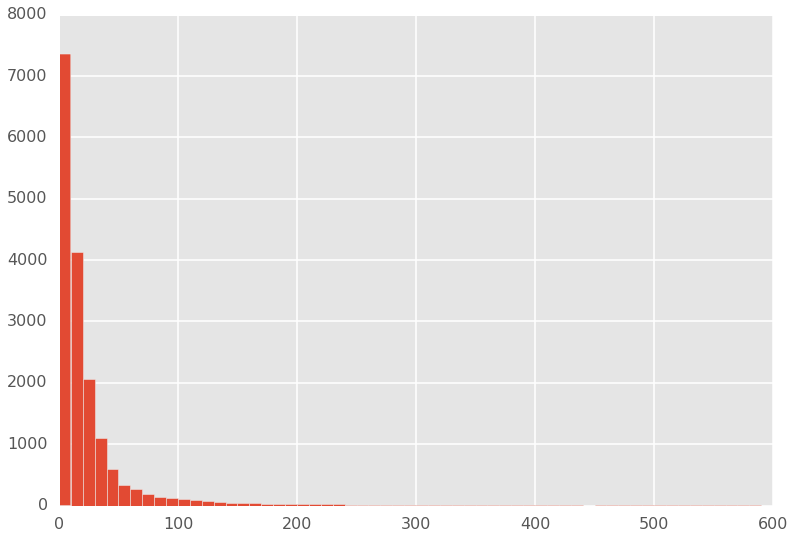

In [50]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
colors = sns.color_palette("deep", 20)
#colors = sns.choose_colorbrewer_palette('qualitative') #{‘sequential’, ‘diverging’, ‘qualitative’}
sns.set(context="poster")
sns.set_style("dark")
## 다음도 스타일 주는법
import matplotlib
matplotlib.style.use('ggplot') 
plt.xlim(0,600)
plt.hist(dr,bins=np.arange(0,600,10))